In [16]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

Regarder des potentielles pistes concernant un weighted k-means algorithm. Les poids seraient le trafic sur la route

In [17]:
donnees_traffics = pd.read_csv(os.path.join("data","tmja-2019.csv"), sep=";")
for colonne in donnees_traffics.columns:
    try:
        donnees_traffics[colonne] = donnees_traffics[colonne].apply(lambda element:element.replace(',',"."))
    except:
        # print(donnees_traffics[colonne].dtype)
        pass
        if donnees_traffics[colonne].dtype == "object":
            # print(colonne)
            pass
for colonne in donnees_traffics.columns:
    try:
        donnees_traffics[colonne] = donnees_traffics[colonne].astype(float)
    except:
        # print(donnees_traffics[colonne].dtype)
        pass
        if donnees_traffics[colonne].dtype == "object":
            pass

In [18]:
from sklearn.cluster import KMeans 
from geopy import distance

In [19]:
donnees_kmeans = donnees_traffics[["route",'xD',"yD","xF", "yF"]]
donnees_kmeans.loc[:, ['xD',"yD","xF", "yF"]]/=1e5
values =["x","y"]
for value in values:
    donnees_kmeans.loc[:,f'center_{value}'] = (donnees_kmeans.loc[:, f"{value}D"]+donnees_kmeans.loc[:,f"{value}F"])/2

C:\Users\32mor\AppData\Local\Temp\ipykernel_24584\3440031257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_kmeans.loc[:, ['xD',"yD","xF", "yF"]]/=1e5
C:\Users\32mor\AppData\Local\Temp\ipykernel_24584\3440031257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_kmeans.loc[:,f'center_{value}'] = (donnees_kmeans.loc[:, f"{value}D"]+donnees_kmeans.loc[:,f"{value}F"])/2
C:\Users\32mor\AppData\Local\Temp\ipykernel_24584\3440031257.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [20]:
def create_tuples(x):
    return (x.center_x, x.center_y)

donnees_kmeans['center_road'] = donnees_kmeans.apply(create_tuples, axis=1)

C:\Users\32mor\AppData\Local\Temp\ipykernel_24584\4171213124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_kmeans['center_road'] = donnees_kmeans.apply(create_tuples, axis=1)


In [21]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=60,init='k-means++')

In [22]:
cluster.fit(donnees_kmeans[['center_x','center_y']])

c:\Users\32mor\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=60)

In [23]:
donnees_kmeans['cluster'] = cluster.predict(donnees_kmeans[['center_x','center_y']])
clusters_center = cluster.cluster_centers_
dict_map_lat = {}
dict_map_long = {}
dict_map_tupple = {}
for i, cluster_center in enumerate(clusters_center):
    dict_map_lat[i] = cluster_center[0]
    dict_map_long[i] = cluster_center[1]
    dict_map_tupple[i] = (cluster_center[0], cluster_center[1])
donnees_kmeans['center_cluster'] = donnees_kmeans['cluster'].map(dict_map_tupple)

C:\Users\32mor\AppData\Local\Temp\ipykernel_24584\1224778797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_kmeans['cluster'] = cluster.predict(donnees_kmeans[['center_x','center_y']])
C:\Users\32mor\AppData\Local\Temp\ipykernel_24584\1224778797.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_kmeans['center_cluster'] = donnees_kmeans['cluster'].map(dict_map_tupple)


In [24]:
distance.distance((1,2),(1.04, 2.02))

Distance(4.951570299567418)

In [25]:
def compute_distance_center_cluster(x):
    return distance.distance(x.center_road, x.center_cluster).km
donnees_kmeans["distance_to_center_cluster"] = donnees_kmeans.apply(compute_distance_center_cluster, axis=1)

C:\Users\32mor\AppData\Local\Temp\ipykernel_24584\207644576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_kmeans["distance_to_center_cluster"] = donnees_kmeans.apply(compute_distance_center_cluster, axis=1)


<AxesSubplot:ylabel='Frequency'>

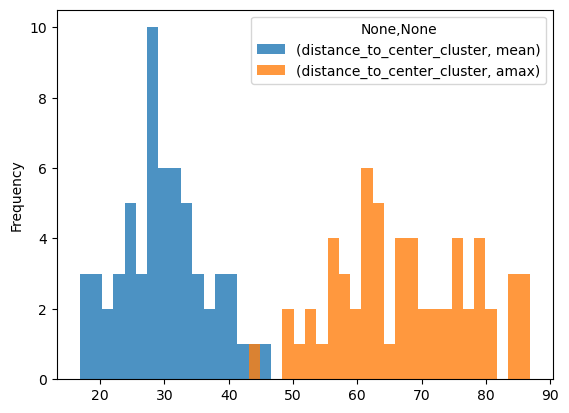

In [26]:
donnees_kmeans.groupby('cluster').agg({"distance_to_center_cluster":[np.mean, np.max]}).plot(kind='hist',alpha=0.8, bins=40)

In [27]:
donnees_kmeans['ratio_PL'] = donnees_traffics['ratio_PL'].values
donnees_kmeans['trafic'] = donnees_traffics['TMJA'].values

C:\Users\32mor\AppData\Local\Temp\ipykernel_24584\2200627314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_kmeans['ratio_PL'] = donnees_traffics['ratio_PL'].values
C:\Users\32mor\AppData\Local\Temp\ipykernel_24584\2200627314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_kmeans['trafic'] = donnees_traffics['TMJA'].values


In [28]:
def compute_proper_ratio_pl(element):
    if not element:
        return None
    element = float(str(element).replace(',',"."))
    if element > 40:
        element /=10
    return element

In [29]:
donnees_kmeans['proper_PL'] = donnees_kmeans['ratio_PL'].apply(compute_proper_ratio_pl)

C:\Users\32mor\AppData\Local\Temp\ipykernel_24584\3729081683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_kmeans['proper_PL'] = donnees_kmeans['ratio_PL'].apply(compute_proper_ratio_pl)


In [30]:
donnees_kmeans.dropna()['distance_to_center_cluster'].max()

86.94169880887404

In [32]:
X = np.random.rand(1000,2)
Y = np.random.rand(50,2)
X[:,0]+=5
X[:,1]+=64
Y[:,0]+=5
Y[:,1]+=64

In [58]:
lat2 = np.radians(X[:,0]).reshape((-1,1))
lat1 = np.radians(Y[:,0]).reshape((1,-1))
lon2 = np.radians(X[:,1]).reshape((-1,1))
lon1 = np.radians(Y[:,1]).reshape((1,-1))
dlat = lat2 - lat1
dlon = lon2 - lon1
a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
c = 2*np.arcsin(np.sqrt(a))
r = 6371
final_result = c*r

In [79]:
flows = np.random.randint(0, 200, len(X))

In [81]:
((final_result.min(axis=1)>10)*1*flows).sum()

33595

In [67]:
final_result.max()

151.61614160616892

In [56]:
np.cos(lat1).shape

(50,)

In [54]:
np.cos(lat1)*np.cos(lat2)

ValueError: operands could not be broadcast together with shapes (50,) (1000,) 